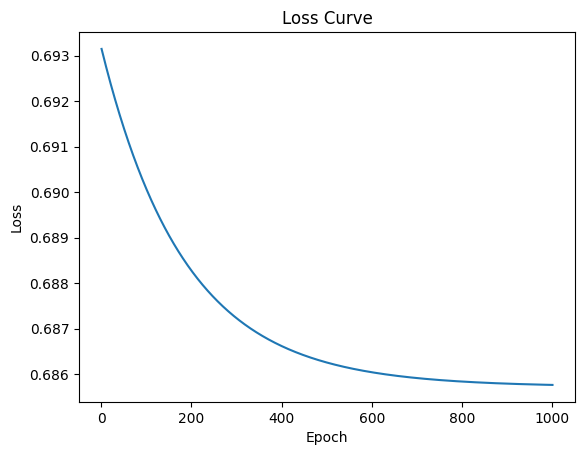

Accuracy: 40.00%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt

# Load Data
file_path = '/content/student_admission_record_dirty.xlsx'  # Replace with the actual file path
data = pd.read_excel(file_path)

# Data Preprocessing
data = data.dropna(subset=['Admission Status'])  # Drop rows without Admission Status
data['Admission Status'] = data['Admission Status'].map({'Accepted': 1, 'Rejected': 0})  # Binary encoding

# Handle missing and invalid values
data.fillna(data.median(numeric_only=True), inplace=True)  # Fill numerical missing values with median
data.fillna('', inplace=True)  # Handle missing strings

# Feature selection
X = data[['Age', 'Admission Test Score', 'High School Percentage']]  # Numerical features
y = data['Admission Status']

# Normalization (Standardization)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Logistic Regression Model
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0
        self.losses = []

        for epoch in range(self.epochs):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            loss = -(1 / self.m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
            self.losses.append(loss)

            dw = (1 / self.m) * np.dot(X.T, (predictions - y))
            db = (1 / self.m) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return [1 if i > 0.5 else 0 for i in predictions]

# Train Model
model = LogisticRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Save Losses
loss_df = pd.DataFrame({'Epoch': range(1, model.epochs + 1), 'Loss': model.losses})
loss_df.to_excel('losses.xlsx', index=False)

# Plot Loss Curve
plt.plot(range(1, model.epochs + 1), model.losses)
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Evaluate Model
predictions = model.predict(X_test)
accuracy = np.mean(predictions == y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Save Results
data['Predicted Status'] = model.predict(X_normalized)
data.to_excel('results.xlsx', index=False)
